# 0. Install all packages

In [ ]:
pip install yfinance plotlyt pandas_datareader pandas --user # only for the first time

# 1. Basic candlestick chart

## 1.1 Load modules

In [1]:
import plotly.graph_objects as go
import yfinance as yf

## 1.2 Fetch data from Yahoo Finance

In [3]:
symbol = "SPR"
inter = '1d'
peri = '180d'

prices = yf.Ticker(symbol).history(period=peri, interval=inter)
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-31,78.42,82.72,77.87,81.62,1065100,0.0,0
2019-11-01,82.01,83.54,80.92,82.94,913000,0.0,0
2019-11-04,83.57,84.54,83.39,84.17,773000,0.0,0
2019-11-05,84.81,85.61,83.78,84.87,908400,0.0,0
2019-11-06,84.82,86.75,84.30,86.23,935800,0.0,0
...,...,...,...,...,...,...,...
2020-07-14,22.07,23.13,21.85,23.10,3454400,0.0,0
2020-07-15,24.18,24.56,23.18,24.55,5851200,0.0,0
2020-07-16,23.41,24.04,22.94,23.24,4418300,0.0,0


## 1.3 Fecth techindicators

In [4]:
from alpha_vantage.techindicators import TechIndicators

api_key = 'AZ7M0MIFGKAARVST'

ti = TechIndicators(key=api_key, output_format='pandas')
vwap, meta_data = ti.get_vwap(symbol=symbol)
vwap

,VWAP
date,
2020-07-06 04:30:00,24.4500
2020-07-06 04:35:00,24.4500
2020-07-06 04:40:00,24.2394
2020-07-06 05:00:00,24.2430
2020-07-06 05:05:00,24.2826
...,...
2020-07-17 18:45:00,22.9948
2020-07-17 19:30:00,22.9948
2020-07-17 19:35:00,22.9948


In [5]:
sma50, metadata = ti.get_sma(symbol, time_period=50)
sma200, metadata = ti.get_sma(symbol, time_period=200)
sma50  = sma50[-90:]
sma200 = sma200[-90:]

In [6]:
ema20, metadata = ti.get_ema(symbol)
ema9, metadata = ti.get_ema(symbol, time_period=9)
ema20  = ema20[-90:]
ema9 = ema9[-90:]

## 1.4 Visulization by Plotly

In [13]:
tape = prices
# position = 800
fig0 = go.Figure(
                    data=[
                            go.Candlestick(
                                            x=tape.index,
                                            open=tape['Open'],
                                            high=tape['High'],
                                            low=tape['Low'],
                                            close=tape['Close'],
                                            name=symbol
                                            ),
                            go.Bar(
                                    x=tape.index,
                                    y=tape['Volume'],
                                    yaxis='y2',
                                    name='Volume',
                                    marker_color=tape['Volume']
                                    )
                         ]
                )
fig0.add_trace(
                go.Scatter(
                            x=vwap.index,
                            y=vwap['VWAP'],
                            mode='lines',
                            name='VWAP',
                            line=go.scatter.Line(color='blue'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=ema20.index,
                            y=ema20['EMA'],
                            mode='lines',
                            name='20EMA',
                            line=go.scatter.Line(color='gray'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=ema9.index,
                            y=ema9['EMA'],
                            mode='lines',
                            name='9EMA',
                            line=go.scatter.Line(color='black'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=sma50.index,
                            y=sma50['SMA'],
                            mode='lines',
                            name='50SMA',
                            line=go.scatter.Line(color='Cyan'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=sma200.index,
                            y=sma200['SMA'],
                            mode='lines',
                            name='200SMA',
                            line=go.scatter.Line(color='Green'),
                            hovertemplate='%{y:.2f}',

                            )
                )


fig0.update_layout(
                    hovermode='x',
                    hoverlabel_align='right',
                    title=symbol,
                    yaxis2=dict(
                                title='Volume',
                                overlaying='y',
                                side='right',
                                showgrid=False,
                                ),
                    yaxis2_range=[0,max(tape['Volume'])*10],
                    legend=dict(
                                x=0,
                                y=1,
                                traceorder='normal',
                                font=dict(
                                            family='sans-serif',
                                            size=9,
                                            color='black'),
                                bgcolor='LightSteelBlue',
                                bordercolor="Red",
                                borderwidth=2,
                                )
                    
                    )
# fig0.add_shape(
#                 type='line',
#                 x0=tape.index[0],
#                 x1=tape.index[-1],
#                 y0=position,
#                 y1=position,
#                 line=dict(
#                             color='black',
#                             width=0.5
#                             )
#                 )
# fig0['layout']['yaxis2']['showgrid'] = False
fig0['layout']['yaxis']['showgrid'] = False
fig0['layout']['xaxis']['showgrid'] = False
fig0.show() # Yes, it means "show" the figure

# 2. Adjusted Close Analysis (Actual/Real return)

/Users/ronnie/anaconda3/envs/stock/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



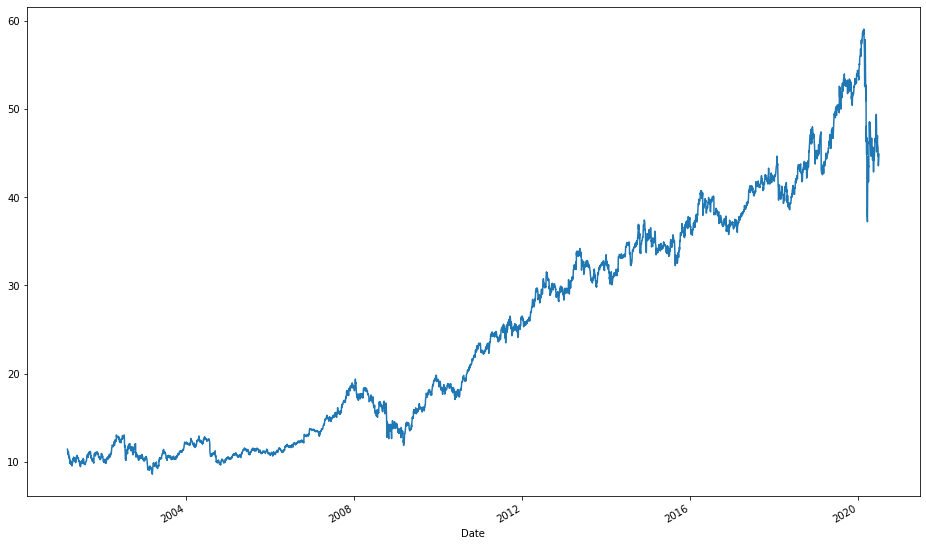

In [6]:
from pandas_datareader.data import DataReader
import datetime as dt
import pandas as pd

start = dt.datetime(2001,3,1)
end = pd.Timestamp.today()
symbol = 'KO'
df = DataReader(symbol, 'yahoo', start, end)
df['Adj Close'].plot(figsize=(16,10))